## (April 2020)

Note: The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site(full description can be found [here](http://insideairbnb.com/get-the-data.html)).

### Exploratory Analysis

First, we take a look at the dataset and format the variables we need for next step analysis.

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import statsmodels.formula.api as smf
df1 = pd.read_csv('/Users/zxie/Dropbox/class/pathrise/listings.csv', delimiter=',', low_memory=False)
df1.head(5)
df1.dtypes
df1['price'] = df1['price'].str.replace(',','').str.replace('$','').astype('float') #change price type from object to float

Now, I will take a few variables out from the origional dataset for analysis. The variables include room features('accommodates','bathrooms','bedrooms','beds', 'square_feet', 'price'), and reviews ('number_of_reviews', 'review_scores_rating', 'reviews_per_month'). I also have the summary statistics for price, accommodates as well as the over all review scores.

In [3]:
sample = df1[['accommodates','bathrooms','bedrooms','beds', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]
sample.dtypes
sample['price'].describe()
sample['accommodates'].describe()
sample['review_scores_rating'].describe()

count    17861.00000
mean        94.97962
std          6.63050
min         20.00000
25%         93.00000
50%         97.00000
75%        100.00000
max        100.00000
Name: review_scores_rating, dtype: float64

Since we want to estimate the price as function of related variables and the to predict price, I plot the histgram and the calculate the correlation among the selected variables.

,accommodates,bathrooms,bedrooms,beds,square_feet,price,number_of_reviews,review_scores_rating,reviews_per_month
accommodates,1.000000,0.352549,0.712780,0.793941,0.125371,0.318070,-0.057256,-0.032821,-0.072817
bathrooms,0.352549,1.000000,0.420539,0.380573,0.197186,0.201558,-0.044042,0.030898,-0.030155
bedrooms,0.712780,0.420539,1.000000,0.753351,0.146613,0.277833,-0.107524,0.022861,-0.145658
beds,0.793941,0.380573,0.753351,1.000000,0.042569,0.267178,-0.027880,-0.017964,-0.051371
square_feet,0.125371,0.197186,0.146613,0.042569,1.000000,0.359093,-0.171776,0.053178,-0.165653
price,0.318070,0.201558,0.277833,0.267178,0.359093,1.000000,-0.068596,0.029884,-0.058623
number_of_reviews,-0.057256,-0.044042,-0.107524,-0.027880,-0.171776,-0.068596,1.000000,0.013895,0.659671
review_scores_rating,-0.032821,0.030898,0.022861,-0.017964,0.053178,0.029884,0.013895,1.000000,0.013674
reviews_per_month,-0.072817,-0.030155,-0.145658,-0.051371,-0.165653,-0.058623,0.659671,0.013674,1.000000


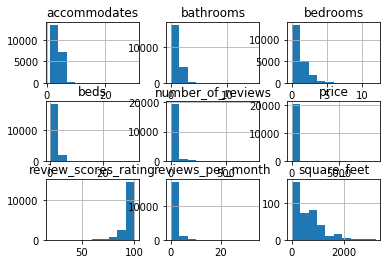

In [4]:
hist = sample.hist()
sample.corr()

I also plot price grouped by the accommodates and the review_scores_rating. The figures are as follows:

Text(0, 0.5, 'Price')

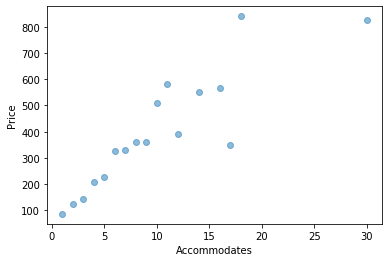

In [5]:
grouped = sample.groupby('accommodates')
mean_price_by_accommodates = grouped['price'].mean()
plt.plot(mean_price_by_accommodates,'o', alpha=0.5)
plt.xlabel('Accommodates')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

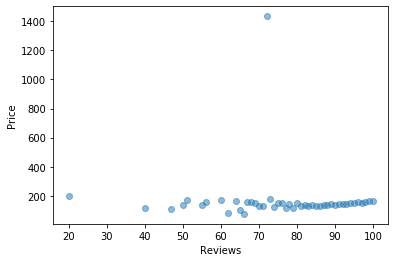

In [6]:
grouped = sample.groupby('review_scores_rating')
mean_price_by_review = grouped['price'].mean()
plt.plot(mean_price_by_review,'o', alpha=0.5)
plt.xlabel('Reviews')
plt.ylabel('Price')

Now we select accommodates and the review_scores_rating as expantory variables for price, the next step is to set up a ordinary least square regression.

### Prediction

In [7]:
results = smf.ols('price ~ accommodates + review_scores_rating',data = sample).fit()
results.params

Intercept              -38.358979
accommodates            38.149988
review_scores_rating     0.870264
dtype: float64

Next, I re-build a dataframe to make predictions for price. To start with an example, I set the accommodates euqals to 2 and the review_scores_rating ranges from 20 to 100:

In [8]:
df_p = pd.DataFrame()
df_p['accommodates'] = np.linspace(2, 2)
df_p['review_scores_rating'] = np.linspace(20, 100)
df_p.head()
pred_p = results.predict(df_p)

The we plot the predictions with the mean price by review:

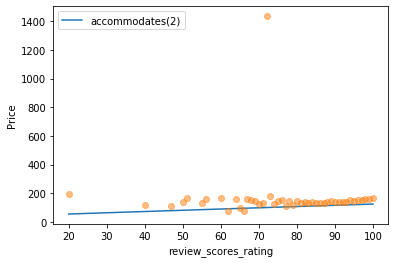

In [9]:
plt.plot(df_p['review_scores_rating'], pred_p, label='accommodates(2)')
plt.plot(mean_price_by_review,'o', alpha=0.5)
plt.xlabel('review_scores_rating')
plt.ylabel('Price')
plt.legend()

#### [END]This is a sample data manipulation. Thanks for review.